In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [2]:
beh_data_dir = "data/COBAR_behaviour.pkl"
beh_df = pd.read_pickle(beh_data_dir)
beh_df

t           twop_index  \
Date   Genotype Fly Trial Frame                                    
210301 J1xCI9   1   0     0        0.005133 -9223372036854775808   
                          1        0.015100 -9223372036854775808   
                          2        0.025100 -9223372036854775808   
                          3        0.035100 -9223372036854775808   
                          4        0.045100 -9223372036854775808   
...                                     ...                  ...   
                    11    25195  251.800000 -9223372036854775808   
                          25196  251.809967 -9223372036854775808   
                          25197  251.819967 -9223372036854775808   
                          25198  251.829967 -9223372036854775808   
                          25199  251.839967 -9223372036854775808   

                                 angle_RF_leg_Coxa_yaw  angle_RF_leg_Coxa  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0                   0.288564           0.406265   
                          1                   0.288564           0.406265   
                          2                   0.358618           0.451284   
                          3                   0.358618           0.451284   
                          4                   0.358618           0.451284   
...                                                ...                ...   
                    11    25195               0.358769           0.444905   
                          25196               0.353103           0.469299   
                          25197               0.353103           0.469299   
                          25198               0.353103           0.469299   
                          25199               0.245832           0.504851   

                                 angle_RF_leg_Coxa_roll  angle_RF_leg_Femur  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0                   -0.484703           -2.437838   
                          1                   -0.501312           -2.448196   
                          2                   -0.489070           -2.514260   
                          3                   -0.514999           -2.504808   
                          4                   -0.497719           -2.494613   
...                                                 ...                 ...   
                    11    25195               -0.703572           -2.578151   
                          25196               -0.713546           -2.601049   
                          25197               -0.713546           -2.601049   
                          25198               -0.743495           -2.590083   
                          25199               -0.739525           -2.634876   

                                 angle_RF_leg_Tibia  angle_RF_leg_Femur_roll  \
Date   Genotype Fly Trial Frame                                                
210301 J1xCI9   1   0     0                2.119772                -0.070825   
                          1                2.097349                -0.089947   
                          2                2.128461                -0.030327   
                          3                2.093834                -0.056415   
                          4                2.116635                -0.038385   
...                                             ...                      ...   
                    11    25195            2.220802                -0.021502   
                          25196            2.245679                -0.019357   
                          25197            2.298148                -0.020857   
                          25198            2.235951                -0.029271   
                          25199            2.185196                -0.055439   

                                 angle_RF_leg_Tarsus  angle_RM_leg_Coxa_yaw  \
Date   

In [3]:
neural_data_dir = beh_data_dir = "data/COBAR_neural.pkl"
neural_df = pd.read_pickle(neural_data_dir)
neural_df

t     neuron_0    neuron_1  \
Date   Genotype Fly Trial Frame                                        
210301 J1xCI9   1   0     0        1.846767   886.468822  539.078854   
                          1        1.908333   904.990346  549.142576   
                          2        1.969900   951.343444  495.389359   
                          3        2.031467   919.118001  488.734655   
                          4        2.093000   811.207176  598.854688   
...                                     ...          ...         ...   
                    11    4035   250.257500  1091.733025  229.036370   
                          4036   250.319067  1083.689512  224.277678   
                          4037   250.380600  1016.800708  263.032693   
                          4038   250.442167  1100.966747  217.181669   
                          4039   250.503733  1127.533714  211.338355   

                                    neuron_2     neuron_3     neuron_4  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0       648.448219   659.934798   960.886917   
                          1       641.978012   673.451323   959.120909   
                          2       667.900427   647.023920   922.999666   
                          3       627.207506   669.359604   967.324279   
                          4       598.844883   614.788711   927.682820   
...                                      ...          ...          ...   
                    11    4035   1673.098351  2788.830860  1832.827041   
                          4036   1626.795243  2803.103042  1869.423843   
                          4037   1624.789506  2755.284855  1924.012693   
                          4038   1569.018839  2890.244587  1921.096732   
                          4039   1718.190280  2731.183736  2022.781228   

                                    neuron_5     neuron_6     neuron_7  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0      1087.578005  1264.055465   689.275322   
                          1      1033.622170  1293.954485   647.848768   
                          2      1035.334534  1298.692514   668.630966   
                          3      1081.832837  1320.492280   697.383989   
                          4      1015.316407  1274.834253   679.311958   
...                                      ...          ...          ...   
                    11    4035   1548.782680  1388.706244  2238.306798   
                          4036   1675.233107  1604.436872  2281.367960   
                          4037   1810.982975  1496.055076  2359.644688   
                          4038   1735.650159  1389.671633  2330.835800   
                          4039   1826.932777  1474.406872  2223.860182   

                                    neuron_8  ...   neuron_113   neuron_114  \
Date   Genotype Fly Trial Frame               ...                             
210301 J1xCI9   1   0     0      1297.684359  ...  1434.945788  1039.457277   
                          1      1253.930092  ...  1432.954386  1032.438934   
                          2      1285.729967  ...  1358.161531   974.769252   
                          3      1255.667939  ...  1386.650784  1004.453438   
                          4      1241.864999  ...  1352.036969   972.731774   
...                                      ...  ...          ...          ...   
                    11    4035   2029.408911  ...   887.114691  1734.396430   
                          4036   2128.465504  ...  1002.946415  1733.634185   
                          4037   2044.958695  ...  1064.565073  1804.522860   
                          4038   2068.464632  ...  1058.037690  1807.967783   
                          4039   1991.379295  ...  1080.679242  1871.425640   

                                  neuron_115   neuron_116  neuron_117  \
Date   Genotype Fly Trial Frame                                         
21030

Here the filtering part, to use it just copy the cell where i define the function and the first lines where define the new filtered panda dataframe

<IPython.core.display.Javascript object>


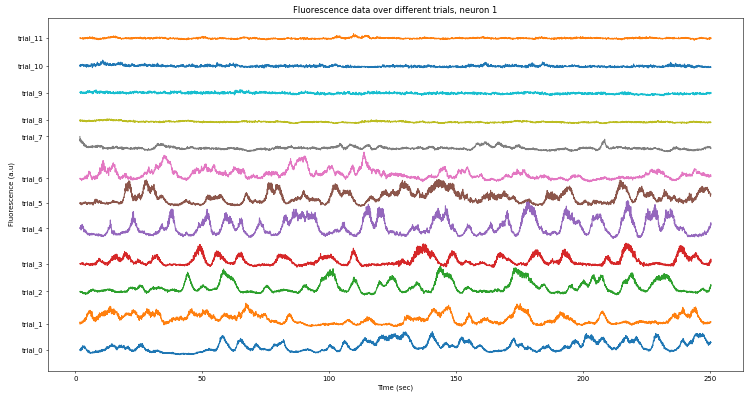

In [4]:
#first reference graph before filtering for neural fleurence data (will then polish it better as for the second one
%matplotlib notebook
import mpld3
mpld3.enable_notebook()
#neural_signals_trial_5 = neural_data[neural_data.index.get_level_values("Trial")==5]
neural_signals_neuron_1 = neural_df["neuron_1"]
# We construct a 3x3 matrix whose elements will be subplots depending on the column and row number they span
fig, ax1 = plt.subplots(figsize = (15,8))

ytick = []
for i in np.arange(12):   
    neural_signals_neuron_1_trial_i = neural_signals_neuron_1[neural_df.index.get_level_values("Trial")==i]
    #ax1.plot(neural_df["t"].iloc[:380], i*1500 + neural_signals_neuron_1_trial_i.iloc[:380], label = 'trial_' + str(i))
    ax1.plot(neural_df["t"].iloc[:4039], i*1500 + neural_signals_neuron_1_trial_i.iloc[:4039], label = 'trial_' + str(i))
    ytick.append(neural_signals_neuron_1_trial_i.iloc[0] + i*1500)
    
ax1.set_ylabel('Fluorescence (a.u)')
ax1.set_xlabel('Time (sec)')
ax1.set_title('Fluorescence data over different trials, neuron 1')

ax1.set_yticks(np.array(ytick))
neuron_names = ['trial_' + str(i) for i in range(12)]
ax1.set_yticklabels(neuron_names)


plt.tight_layout()
plt.show()
fig.savefig('report_images/w8_fluo_neurone1.png')

In [6]:

# Filter requirements Butterworth
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data, axis=0)
    return y
filtered_neural_df = neural_df.copy(deep=True) #necessary to deep copy dataaframe
fs=16.0
order=2
cutoff=2.5
filtered_neural_df_neuron_1 = butter_lowpass_filter(neural_df['neuron_1'], cutoff, fs, order) #this line has to be used with the following one
filtered_neural_df.neuron_1=filtered_neural_df_neuron_1 #this line has to be used, cutoff is 2.5

<IPython.core.display.Javascript object>


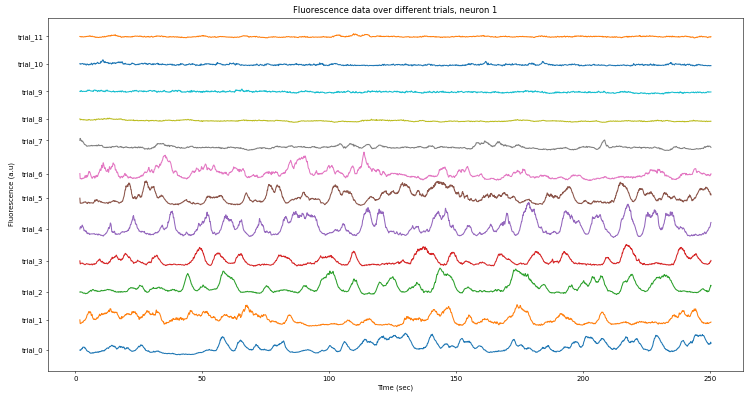

In [7]:


#this is jsut for plotting
neural_signals_neuron_1 = filtered_neural_df['neuron_1']
%matplotlib notebook
import mpld3
mpld3.enable_notebook()
#neural_signals_trial_5 = neural_data[neural_data.index.get_level_values("Trial")==5]
#neural_signals_neuron_1 = neural_df["neuron_1"]
# We construct a 3x3 matrix whose elements will be subplots depending on the column and row number they span
fig, ax1 = plt.subplots(figsize = (15,8))

ytick = []
for i in np.arange(12):   
    neural_signals_neuron_1_trial_i = neural_signals_neuron_1[neural_df.index.get_level_values("Trial")==i]
    #ax1.plot(neural_df["t"].iloc[:380], i*1500 + neural_signals_neuron_1_trial_i.iloc[:380], label = 'trial_' + str(i))
    ax1.plot(neural_df["t"].iloc[:4039], i*1500 + neural_signals_neuron_1_trial_i.iloc[:4039], label = 'trial_' + str(i))
    ytick.append(neural_signals_neuron_1_trial_i.iloc[0] + i*1500)
    
ax1.set_ylabel('Fluorescence (a.u)')
ax1.set_xlabel('Time (sec)')
ax1.set_title('Fluorescence data over different trials, neuron 1')

ax1.set_yticks(np.array(ytick))
neuron_names = ['trial_' + str(i) for i in range(12)]
ax1.set_yticklabels(neuron_names)


plt.tight_layout()
plt.show()
fig.savefig('report_images/w8_fluo_neurone1.png')

Same buttenworth filter but for beh data, take whatever cutoof you prefer probably, i would say around 21

<IPython.core.display.Javascript object>


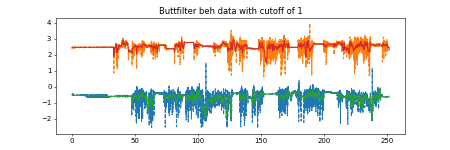

<IPython.core.display.Javascript object>


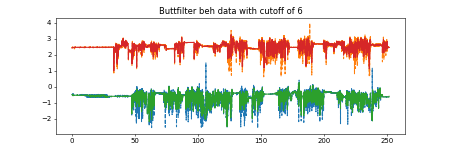

<IPython.core.display.Javascript object>


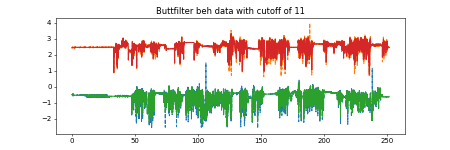

<IPython.core.display.Javascript object>


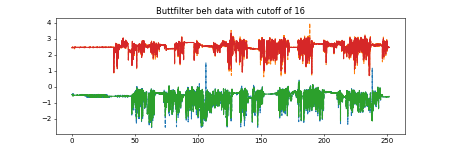

<IPython.core.display.Javascript object>


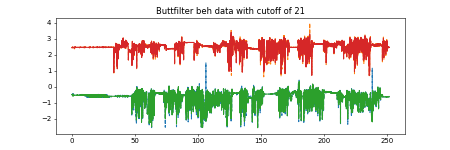

<IPython.core.display.Javascript object>


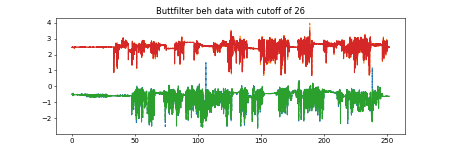

<IPython.core.display.Javascript object>


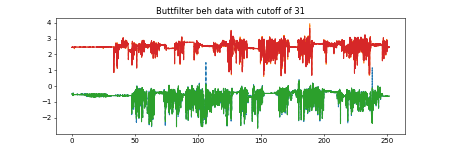

<IPython.core.display.Javascript object>


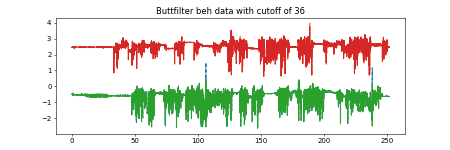

<IPython.core.display.Javascript object>


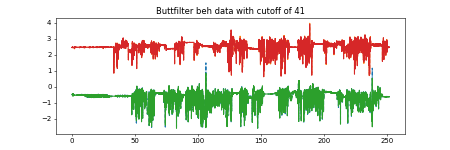

<IPython.core.display.Javascript object>


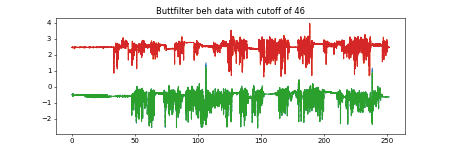

In [9]:
#behavioral noise filter
fs=100.0
order=2
cutoff=20
filtered_beh_df = beh_df.copy(deep=True)
#plot unifltered
angle_RF_leg_roll = beh_df["angle_RF_leg_Coxa_roll"]
time = beh_df["t"]
%matplotlib notebook
import mpld3
mpld3.enable_notebook()
ytick = []
rangefcut=range(1,49,5)
for cutoff in rangefcut:
    fig, ax = plt.subplots(figsize = (9,3))
    for i in range(2):
        y = angle_RF_leg_roll[angle_RF_leg_roll.index.get_level_values("Trial")==i]+3*i
        t=time[time.index.get_level_values("Trial")==i]
        plt.plot(t, y, alpha = 1, linestyle='dashed')
        ytick.append(angle_RF_leg_roll.iloc[0] + i*3)
    #superimposed filtered data
    filtered_beh_df_anglerf = butter_lowpass_filter(beh_df["angle_RF_leg_Coxa_roll"], cutoff, fs, order)
    filtered_beh_df.angle_RF_leg_Coxa_roll=filtered_beh_df_anglerf
    filtered_angle_RF_leg_roll = filtered_beh_df["angle_RF_leg_Coxa_roll"]
    time = filtered_beh_df["t"]
#fig, ax = plt.subplots(figsize = (15,8))
    ytick = []

    for i in range(2):
        y = filtered_angle_RF_leg_roll[filtered_angle_RF_leg_roll.index.get_level_values("Trial")==i]+3*i
        t=time[time.index.get_level_values("Trial")==i]
        plt.plot(t, y, alpha = 1) 
        ytick.append(filtered_angle_RF_leg_roll.iloc[0] + i*3)
        plt.title(f"Buttfilter beh data with cutoff of {cutoff}")
#ax.set_yticks(np.array(ytick))
#trial_names = ['trial_' + str(i) for i in range(12)]
#ax.set_yticklabels(trial_names)
#ax.set_ylabel('Angle (rad)')
#ax.set_xlabel('Time (sec)')
#ax.set_title('Coxa-roll angle of Right Front leg in different trials')
plt.show()
fig.savefig('report_images/buttfilt_Coxa-roll.png')